# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

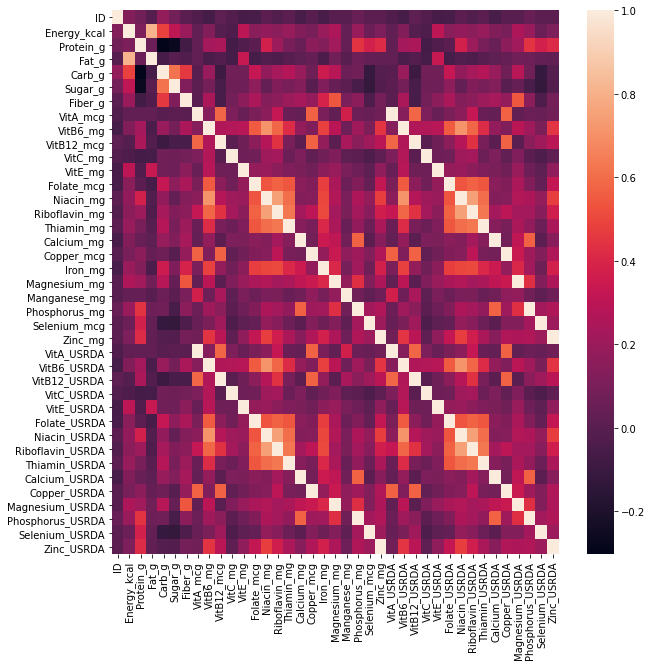

In [5]:
plt.figure(figsize=(10, 10))
seaborn.heatmap(df.corr());

In [7]:
data = df.iloc[:, 0:-15]

In [8]:
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Variables no numércias
Elimina las variables de texto del dataset

In [11]:
data = data.iloc[:, 7:]

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [12]:
data = data +1
data.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

In [14]:
data = np.log(data)

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [15]:
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [16]:
data.shape

(8618, 23)

In [17]:
pca = PCA(n_components=23)
pca.fit(data_scaled)
X_pca = pca.transform(data_scaled)
print(X_pca.shape)
X_pca

(8618, 23)


array([[-2.13903189, -0.96801891, -1.46398817, ...,  0.18965049,
        -0.11318379, -0.9906675 ],
       [-2.1064854 , -0.90950144, -1.48058025, ...,  0.27098865,
        -0.10503073, -0.99697913],
       [-3.26782972, -1.13842955, -2.04233529, ..., -0.04375945,
        -0.02955105, -0.96973915],
       ...,
       [-2.93052905,  1.66440526, -1.24206984, ...,  0.48350769,
         0.59177161, -0.63639048],
       [ 1.11889546, -0.78083408,  0.80512618, ...,  0.65270747,
         0.98403199,  0.37786612],
       [ 0.37955124, -1.27668203,  1.59197004, ...,  0.34724908,
         0.3352501 , -0.52011023]])

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

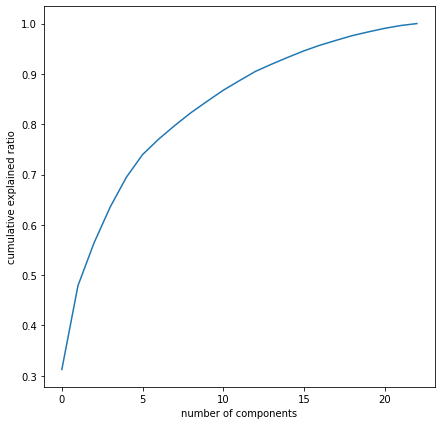

In [22]:
plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained ratio');

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [25]:
pca6 = PCA(n_components = 6)
pca6.fit(data_scaled)
X_pca6 = pca6.transform(data_scaled)

In [26]:
final = pd.DataFrame(X_pca6, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
final.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968018,-1.463997,0.270969,4.067038,0.306874
1,-2.106485,-0.909501,-1.480588,0.263322,4.032500,0.348295
2,-3.267830,-1.138430,-2.042338,1.175464,4.071745,1.326571
3,1.525964,-1.264101,0.135999,-0.929716,2.430557,-2.095502
4,1.240712,-1.204119,0.004712,-1.191852,2.691826,-2.342316


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [28]:
final2 = pd.merge(df[['FoodGroup', 'ShortDescrip', 'Descrip']],
                  final,
                  left_index=True,
                  right_index=True)
final2.head()

,FoodGroup,ShortDescrip,Descrip,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",-2.139032,-0.968018,-1.463997,0.270969,4.067038,0.306874
1,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",-2.106485,-0.909501,-1.480588,0.263322,4.032500,0.348295
2,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",-3.267830,-1.138430,-2.042338,1.175464,4.071745,1.326571
3,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",1.525964,-1.264101,0.135999,-0.929716,2.430557,-2.095502
4,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",1.240712,-1.204119,0.004712,-1.191852,2.691826,-2.342316


In [32]:
for columnName, columnData in final2[['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6']].iteritems():
    final2.sort_values(by=columnName, ascending=False, inplace=True)
    print(columnName)
    print(final2['FoodGroup'].iloc[:5])
    print(type(columnData))
    print('\n')

PC1
1832    Breakfast Cereals
1863    Breakfast Cereals
2025    Breakfast Cereals
4454            Beverages
1850    Breakfast Cereals
Name: FoodGroup, dtype: object
<class 'pandas.core.series.Series'>


PC2
4190                            Beverages
3577    Vegetables and Vegetable Products
3320    Vegetables and Vegetable Products
271                      Spices and Herbs
1863                    Breakfast Cereals
Name: FoodGroup, dtype: object
<class 'pandas.core.series.Series'>


PC3
8537                        Beverages
4355                        Beverages
5277    Lamb, Veal, and Game Products
973                  Poultry Products
974                  Poultry Products
Name: FoodGroup, dtype: object
<class 'pandas.core.series.Series'>


PC4
1850    Breakfast Cereals
1867    Breakfast Cereals
2025    Breakfast Cereals
7648               Snacks
2029    Breakfast Cereals
Name: FoodGroup, dtype: object
<class 'pandas.core.series.Series'>


PC5
776    Fats and Oils
632    Fats and Oils
78